## Visualizing FordGo Bike Data
### Comparison of first 3 months January, February and March of the year 2019 and year 2020.

First 3 months of the year i.e. January, February and March are considered to be the winter months and hence I have made exploratory analysis for these months of the year 2019 and year 2020. The dataset used consists of the monthly trip data of the respective months in the CSV format.

In [72]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
no_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [73]:
df_bike_clean = pd.read_csv('baywheels_tripdata_clean.csv')
df_bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_year,start_time_month_no,start_time_month,start_time_weekday,duration_min,start_time_hour,end_time_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,2019,1,January,Thu,1347,17,16
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,2019,1,January,Thu,1098,20,15
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,2019,1,January,Thu,1043,18,11
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,2019,1,January,Thu,744,19,8
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,2019,1,January,Thu,1011,14,7


In [75]:
#check the months
df_bike_clean.start_time_month.value_counts()

February    604761
January     484472
March       422175
Name: start_time_month, dtype: int64

In [4]:
df_bike_clean_2019 = df_bike_clean.query('start_time_year == "2019"')
df_bike_clean_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_year,start_time_month_no,start_time_month,start_time_weekday,duration_min,start_time_hour,end_time_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,2019,1,January,Thu,1347,17,16
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,2019,1,January,Thu,1098,20,15
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,2019,1,January,Thu,1043,18,11
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,2019,1,January,Thu,744,19,8
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,2019,1,January,Thu,1011,14,7


In [5]:
df_bike_clean_2020 = df_bike_clean.query('start_time_year == "2020"')
df_bike_clean_2020.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_year,start_time_month_no,start_time_month,start_time_weekday,duration_min,start_time_hour,end_time_hour
631793,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,2020,1,January,Fri,1385,15,14
631794,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,2020,1,January,Fri,1137,15,10
631795,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,2020,1,January,Fri,923,17,9
631796,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,2020,1,January,Fri,915,17,9
631797,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,2020,1,January,Fri,928,17,8


#### Ford GoBike System usage by Days in Month - 2019 vs. 2020

The below graph will show the comparison of usage of FordGo Bike Syyen in months of year 2019 and year 2020. The increasr/decrease in the usage will be observed from the below graph.

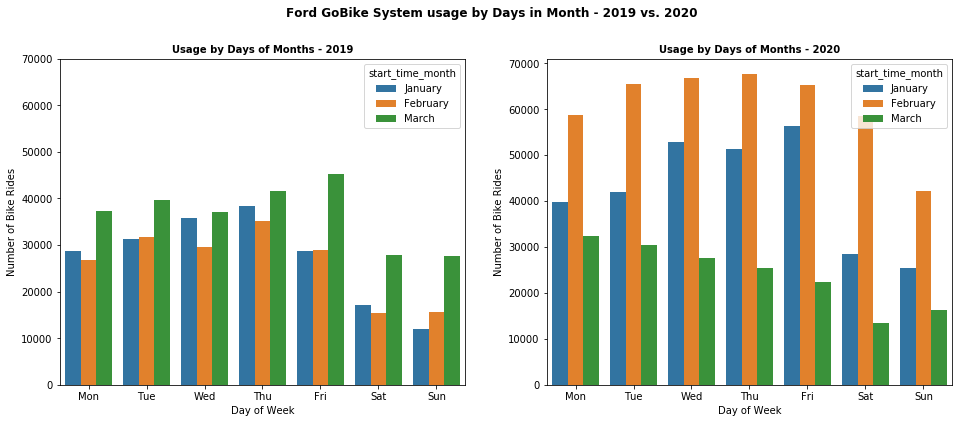

In [80]:
plt.figure(figsize=[16, 6]);

plt.subplot(1, 2, 1);
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df_bike_clean_2019, x='start_time_weekday', hue='start_time_month', order= weekday) ;
plt.title('Usage by Days of Months - 2019', fontsize=10, fontweight='bold');
plt.xlabel('Day of Week');
plt.ylabel('Number of Bike Rides');
plt.yticks(np.arange(0, 70000+10000, 10000)) #/*to make y-axis of both graph similar for easy comparison*/

plt.subplot(1, 2, 2);
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df_bike_clean_2020, x='start_time_weekday', hue='start_time_month', order= weekday);
plt.title('Usage by Days of Months - 2020', fontsize=10, fontweight='bold');
plt.xlabel('Day of Week');
plt.ylabel('Number of Bike Rides');
plt.suptitle('Ford GoBike System usage by Days in Month - 2019 vs. 2020', fontsize=12, fontweight='bold', y=1.0);

Overall usage in year 2020 is much more than that of year 2019. Seems that FordGo Bike System got the popularity and acceptance rate of the users towards it increased. In 2020, the usage in the Month of March decreased.

#### Hourly usage of the Ford Go Bike System 2019 vs 2020

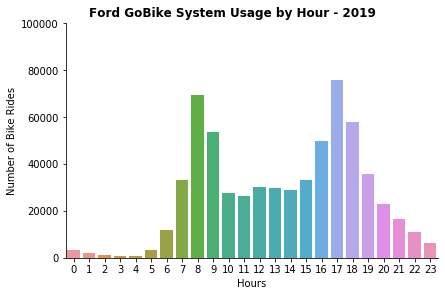

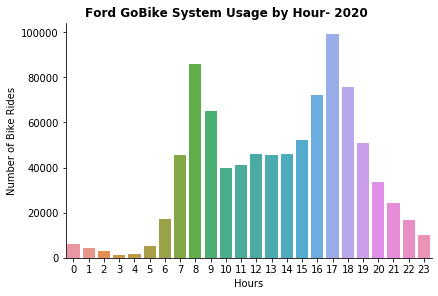

In [81]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df_bike_clean_2019, x='start_time_hour', kind='count',  aspect = 1.5, height=4);
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour - 2019', y=1.02, fontsize=12, fontweight='bold');
plt.yticks(np.arange(0, 100000+10000, 20000)) #/*to make y-axis of both graph similar for easy comparison*/

graph = sb.catplot(data = df_bike_clean_2020, x='start_time_hour', kind='count', aspect = 1.5, height=4);
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour- 2020', y=1.02, fontsize=12, fontweight='bold');

The usage pattern seems to be quiet similar in both the graphs, stating the reasons of the users to use the system were similar in 2019 and 2020.

#### Ford GoBike System - Customers vs. Subscribers vs. Year

The graph shows the percent increase in the Customers from 2019 to 2020 in winter months.

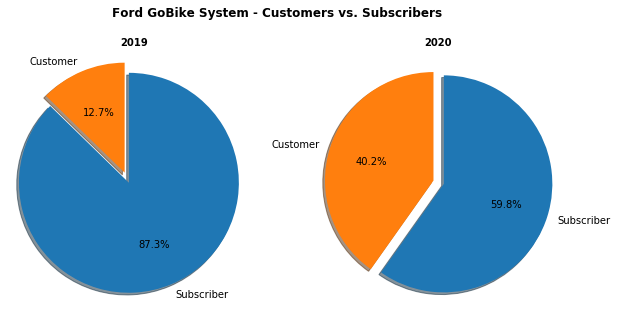

In [52]:
plt.figure(figsize=[10, 6]);

plt.subplot(1, 2, 1);
sorted_value = df_bike_clean_2019.user_type.value_counts()/df_bike_clean_2019.shape[0];
plt.title('2019', fontsize=10, fontweight='semibold')
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_value.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
sorted_value = df_bike_clean_2020.user_type.value_counts()/df_bike_clean_2020.shape[0];
plt.title('2020', fontsize=10, fontweight='semibold')
plt.pie(sorted_value, explode=[0, 0.1], labels=sorted_value.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=0.9, fontsize=12, fontweight='bold');

#### Ford GoBike System Trends by User Type- Customers and Subscribers vs. Year

The below graph shows the usage trend of the system by Customers and Subcribers in the year 2019 and 2020. Subcribers follow the same pattern. Maximum usage over weedays Mon-Fri and it decreases over weekend Sat-Sun.

While customers in both the years have in-verse pattern. 2019, the customer usage increases over weekend Sat-Sun while in 2020, the usage is more on weekdays Mon-Fri and drecrease on weekends Sat-Sun.

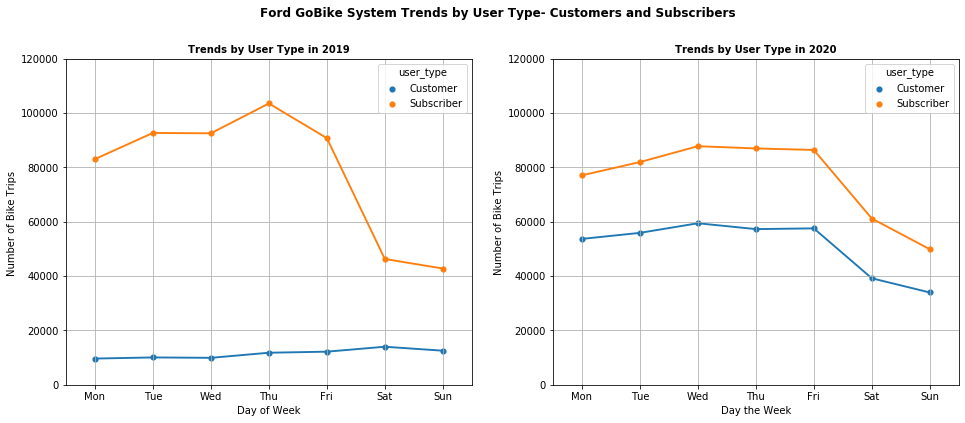

In [90]:
plt.figure(figsize=[16, 6]);

plt.subplot(1, 2, 1);
df_cleaned_user_week = df_bike_clean_2019.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);
plt.title('Trends by User Type in 2019', fontsize=10, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips ');
plt.grid()
plt.yticks(np.arange(0, 120000+10000, 20000))#/*to make y-axis of both graph similar for easy comparison*/

plt.subplot(1, 2, 2);
df_cleaned_user_week = df_bike_clean_2020.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);
plt.title('Trends by User Type in 2020', fontsize=10, fontweight='bold')
plt.xlabel('Day the Week')
plt.ylabel('Number of Bike Trips');
plt.grid()
plt.yticks(np.arange(0, 120000+10000, 20000))#/*to make y-axis of both graph similar for easy comparison*/
plt.suptitle('Ford GoBike System Trends by User Type- Customers and Subscribers', fontsize=12, fontweight='bold', y=1.0);


#### Ford GoBike System - Start Time vs. Day of Week by User Type - 2019

Subcribers tends to use FordGoBike System on weekdays Mon-Fri the most, during the time 8am-9am and 5pm-6pm. While Customers are using the system on weekends Sat-Sun, at 2 pm the most on Satudays and 12pm-2pm on Sunday which is relatively hotter hours in the winter months.

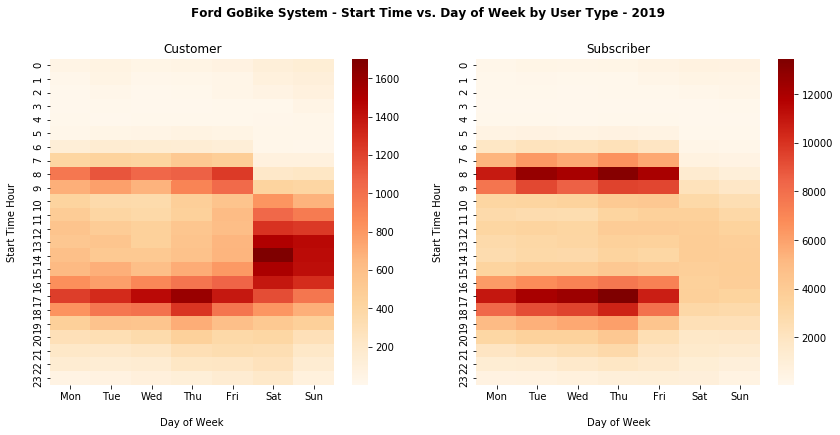

In [86]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_bike_clean_2019['start_time_weekday'] = pd.Categorical(df_bike_clean_2019['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[14, 6]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_bike_clean_2019.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_customer, cmap = 'OrRd')

plt.title('Customer', y=1.05)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_bike_clean_2019.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_subscriber, cmap = 'OrRd')

plt.title("Subscriber", y=1.05)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.suptitle('Ford GoBike System - Start Time vs. Day of Week by User Type - 2019', y = 1.0, fontsize = 12, fontweight = 'bold');


#### Ford GoBike System - Start Time vs. Day of Week by User Type - 2020

Subcribers and Customers both tends to use FordGoBike System on weekdays Mon-Fri the most, during the same time of 8am-9am and 5pm-6pm, while considerably very less rides have been take on weekends.

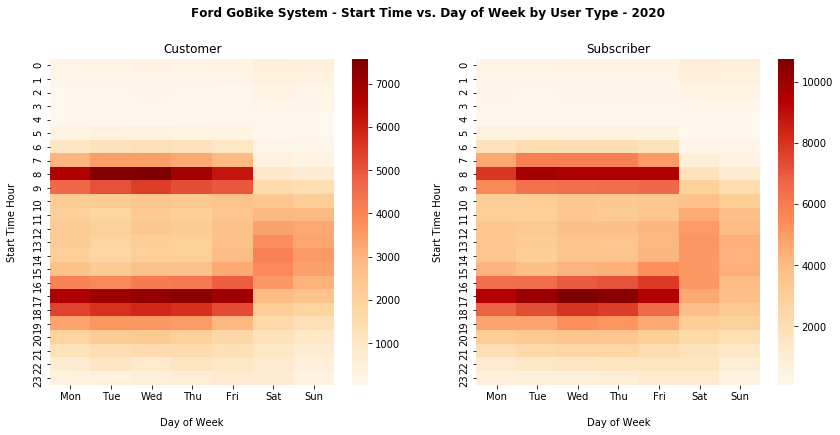

In [87]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_bike_clean_2020['start_time_weekday'] = pd.Categorical(df_bike_clean_2020['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[14, 6]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_bike_clean_2020.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_customer, cmap = 'OrRd')

plt.title('Customer', y=1.05)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_bike_clean_2020.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_subscriber, cmap = 'OrRd')

plt.title("Subscriber", y=1.05)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.suptitle('Ford GoBike System - Start Time vs. Day of Week by User Type - 2020', y = 1.0, fontsize = 12, fontweight = 'bold');


### Summary

FordGo Bike System was a great project to explore and do analysis. First 3 months of the year 2019 an 2020 was compared and the usage trends as per day, month, year is observed. Also the usage pattern as per the User Types is been observed.

Next (Future): Planning to do analysis of Winter vs. Summer Months of the year 2020 to see "How climate changes affect the usage of the sytem".